<a href="https://colab.research.google.com/github/manas-nambiar/NLP-Sentience-Assessment-Framework/blob/main/Amazon_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Amazon Reviews
This program will utilize the VADER tool from Python's Natural Language Toolkit and the roBERTa-base model from Hugging Face.

To test these models, I will be using a collection of roughly 500,000 Amazon reviews from Kaggle. The dataset can be downloaded here: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
from google.colab import drive
drive.mount("/content/drive")
dataset_path = "/content/drive/My Drive/AmazonReviews/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Limiting the size of the dataset to 500 for time purposes

In [51]:
df = pd.read_csv('/content/drive/My Drive/AmazonReviews/Reviews.csv')
df = df.head(500)

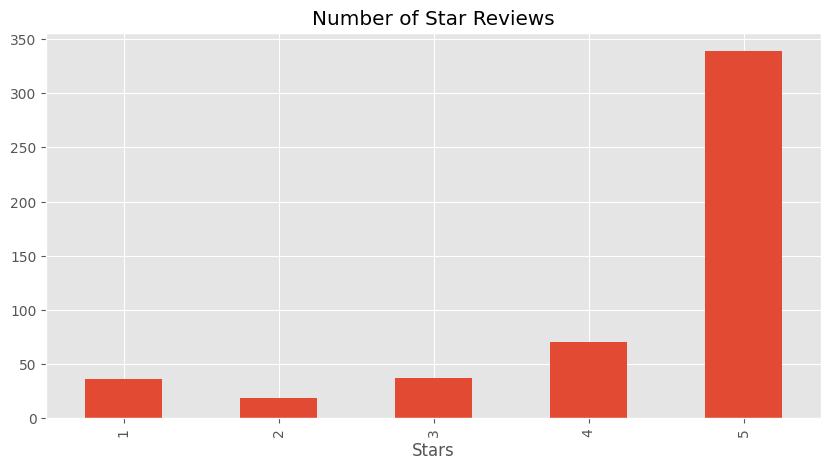

In [52]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Number of Star Reviews', figsize=(10, 5))
ax.set_xlabel('Stars')
plt.show()

Sample rating

In [53]:
sample = df['Text'][75]
print(sample)

No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.


Tokenizing the sample review

In [54]:
tokens = nltk.word_tokenize(sample)
print(tokens)

['No', 'tea', 'flavor', 'at', 'all', '.', 'Just', 'whole', 'brunch', 'of', 'artifial', 'flavors', '.', 'It', 'is', 'not', 'returnable', '.', 'I', 'wasted', '20+', 'bucks', '.']


Tagging the tokens based on VADER's pre-determined tags

In [55]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('No', 'DT'), ('tea', 'NN'), ('flavor', 'NN'), ('at', 'IN'), ('all', 'DT'), ('.', '.'), ('Just', 'NNP'), ('whole', 'JJ'), ('brunch', 'NN'), ('of', 'IN'), ('artifial', 'JJ'), ('flavors', 'NNS'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('returnable', 'JJ'), ('.', '.'), ('I', 'PRP'), ('wasted', 'VBD'), ('20+', 'CD'), ('bucks', 'NNS'), ('.', '.')]


 Identifying and classifying named entities in the review

In [56]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  No/DT
  tea/NN
  flavor/NN
  at/IN
  all/DT
  ./.
  Just/NNP
  whole/JJ
  brunch/NN
  of/IN
  artifial/JJ
  flavors/NNS
  ./.
  It/PRP
  is/VBZ
  not/RB
  returnable/JJ
  ./.
  I/PRP
  wasted/VBD
  20+/CD
  bucks/NNS
  ./.)


Applying Valence Aware Dictionary and sEntiment Reasoner (VADER) for Sentiment Scoring

In [57]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [58]:
sia.polarity_scores("I feel great!")

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [59]:
sia.polarity_scores("I feel normal")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [60]:
sia.polarity_scores("I don't feel good")

{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3412}

In [61]:
sia.polarity_scores(sample)

{'neg': 0.106, 'neu': 0.768, 'pos': 0.126, 'compound': 0.1098}

Apply polarity score to all reviews

In [62]:
result = {}
for i, row in tqdm(df.iterrows()):
  text = row['Text']
  myid = row['Id']
  result[myid] = sia.polarity_scores(text)

0it [00:00, ?it/s]

In [67]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot the VADER results

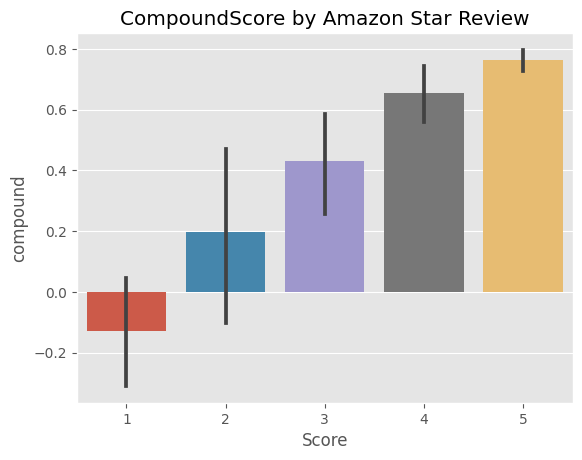

In [68]:
ax = sns.barplot(data = vaders, x='Score', y='compound')
ax.set_title('CompoundScore by Amazon Star Review')
plt.show()

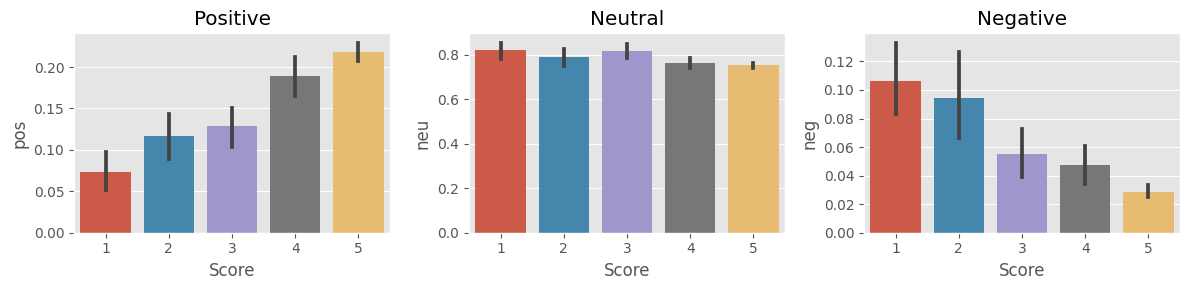

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

Applying the roBERTa pretrained model on the reviews

In [74]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.9 MB/s eta 0:00:00


In [76]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [78]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [81]:
encoded_text = tokenizer(sample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
scores_dict = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9441382, 'roberta_neu': 0.050168056, 'roberta_pos': 0.005693689}


In [82]:
def polarity_scores_roberta(sample):
  encoded_text = tokenizer(sample, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores
  scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
  }
  return scores_dict

In [95]:
result = {}
for i, row in tqdm(df.iterrows()):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    combined_result = {**vader_result_rename, **roberta_result}
    result[myid] = combined_result
  except RuntimeError:
    print(f'Broke for id {myid}')

0it [00:00, ?it/s]

Broke for id 83
Broke for id 187


In [98]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Score comparison between VADER and roBERTa

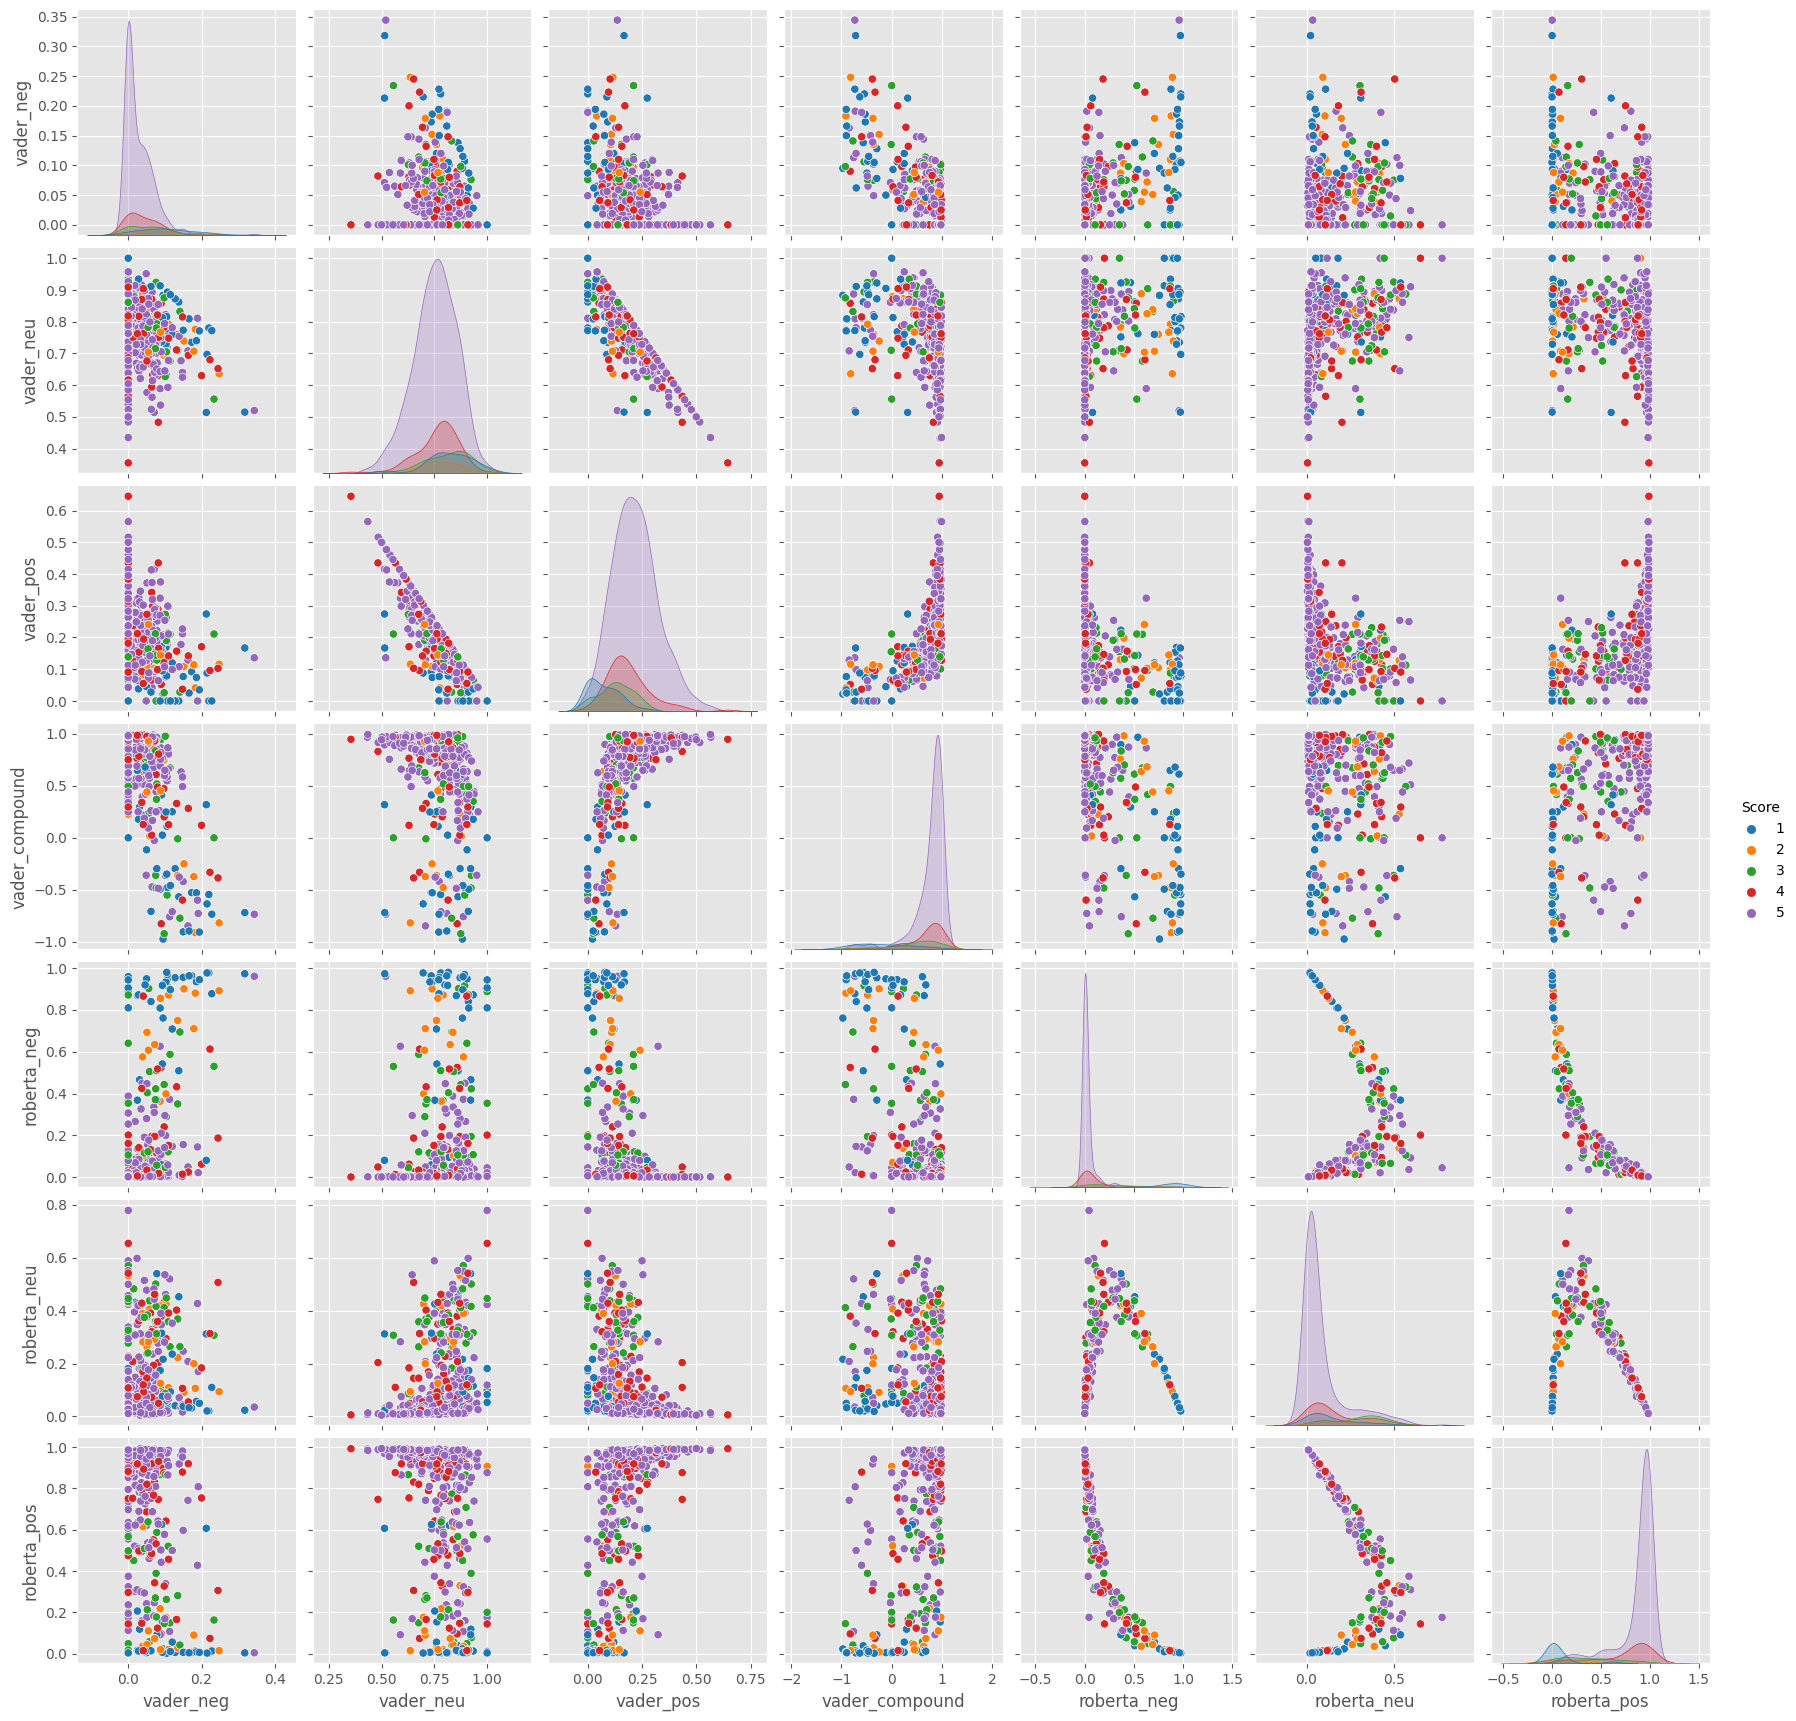

In [102]:
results_df.columns
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Score', palette='tab10')
plt.show()